In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


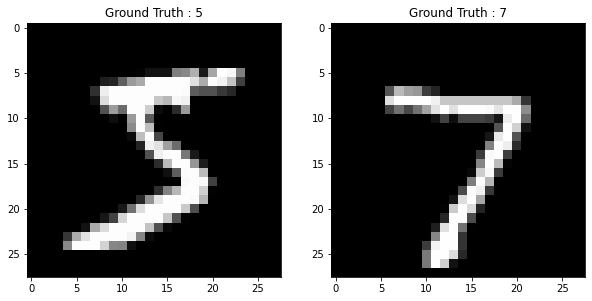

In [4]:
from keras.utils import to_categorical
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
# Find the unique numbers from the trpy ain labels

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Eğitim setindeki ilk resimi çizdirelim
plt.subplot(121)
plt.imshow(train_images[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Test setindeki ilk resimi çizdirelim
plt.subplot(122)
plt.imshow(test_images[0, :, :], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

<pre name="af01" id="af01" class="graf graf--pre graf-after--p"># Change to float datatype<br>train_data = train_data.astype('float32')<br>test_data = test_data.astype('float32')</pre>

In [5]:
# Change from matrix to array of dimension 28x28 to array of #dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [6]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [7]:
train_data /= 255
test_data /= 255

In [8]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<pre name="7778" id="7778" class="graf graf--pre graf-after--p">from keras.models import Sequential<br>from keras.layers import Dense<br><br>model = Sequential()<br>model.add(Dense(512, activation='relu', input_shape=(dimData,)))<br>model.add(Dense(512, activation='relu'))<br>model.add(Dense(nClasses, activation='softmax'))</pre>

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

<pre name="caf2" id="caf2" class="graf graf--pre graf-after--p">history = model.fit(train_data, train_labels_one_hot,batch_size=256, epochs=20, verbose=1,validation_data(test_data,test_labels_one_hot))</pre>

In [14]:
history = model.fit(train_data, train_labels_one_hot,batch_size=256, epochs=20, verbose=1, validation_data=(test_data,test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 6s 25ms/step - loss: 0.2696 - accuracy: 0.9168 - val_loss: 0.1424 - val_accuracy: 0.9579
Epoch 2/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0940 - accuracy: 0.9713 - val_loss: 0.0843 - val_accuracy: 0.9747
Epoch 3/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0583 - accuracy: 0.9813 - val_loss: 0.0707 - val_accuracy: 0.9800
Epoch 4/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0632 - val_accuracy: 0.9821
Epoch 5/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0654 - val_accuracy: 0.9805
Epoch 6/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0693 - val_accuracy: 0.9825
Epoch 7/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.1058 - val_accuracy: 0.9720

In [16]:
print(history.history.keys())
[test_loss, test_acc] =model.evaluate(test_data,test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy {}".format(test_loss, test_acc))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
313/313 [==============================] - 1s 3ms/step - loss: 0.1278 - accuracy: 0.9821
Evaluation result on Test Data : Loss = 0.12780413031578064, accuracy 0.9821000099182129


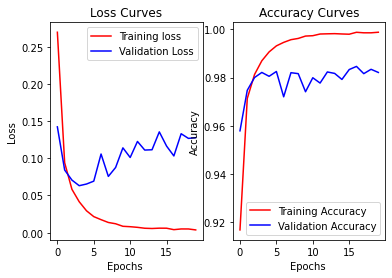

In [20]:
# Plot the Loss Curves
plt.subplot(121)
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')

# Plot the Accuracy Curves
plt.subplot(122)
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.show()

In [21]:
#dropout için yeniden düzenleme
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Epoch 1/20
235/235 [==============================] - 7s 30ms/step - loss: 0.0555 - accuracy: 0.9854 - val_loss: 0.0833 - val_accuracy: 0.9841
Epoch 2/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.0862 - val_accuracy: 0.9828
Epoch 3/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0459 - accuracy: 0.9868 - val_loss: 0.0906 - val_accuracy: 0.9831
Epoch 4/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0457 - accuracy: 0.9869 - val_loss: 0.0855 - val_accuracy: 0.9836
Epoch 5/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0437 - accuracy: 0.9878 - val_loss: 0.0881 - val_accuracy: 0.9845
Epoch 6/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.0965 - val_accuracy: 0.9833
Epoch 7/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0408 - accuracy: 0.9890 - val_loss: 0.0981 - val_accuracy: 0.9834

KeyError: ignored

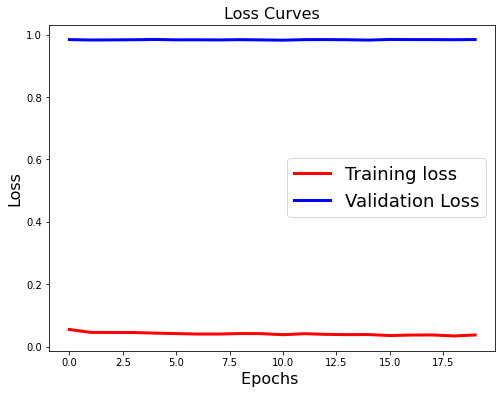

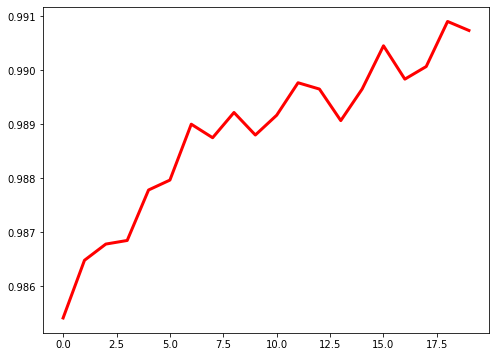

In [23]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

# Plot the Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(history_reg.history['loss'], 'r', linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Plot the Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(history_reg.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history_reg.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()